<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Алгоритм" data-toc-modified-id="Алгоритм-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><strong>Алгоритм</strong></a></span></li><li><span><a href="#Обоснование" data-toc-modified-id="Обоснование-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><strong>Обоснование</strong></a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Качество-линейной-регресии-на-нешифрованных-данных" data-toc-modified-id="Качество-линейной-регресии-на-нешифрованных-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Качество линейной регресии на нешифрованных данных</a></span></li><li><span><a href="#Качество-линейной-регресии-c-шифрованием-данных" data-toc-modified-id="Качество-линейной-регресии-c-шифрованием-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Качество линейной регресии c шифрованием данных</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')


In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None


In [4]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [6]:
df['Пол'].value_counts()

0    2505
1    2495
Name: Пол, dtype: int64

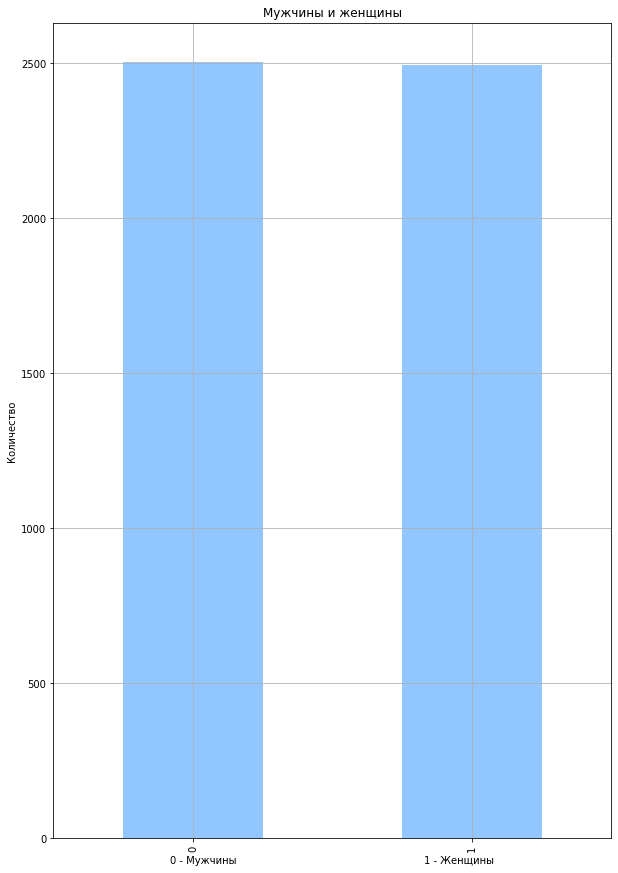

In [7]:
(
    df['Пол']
    .value_counts()
    .plot(kind='bar',
          figsize = (10,15), 
          label = 'Пол', 
          grid =True)
)
plt.title('Мужчины и женщины')
plt.xlabel("0 - Мужчины                                                            1 - Женщины")
plt.ylabel("Количество")
plt.show()


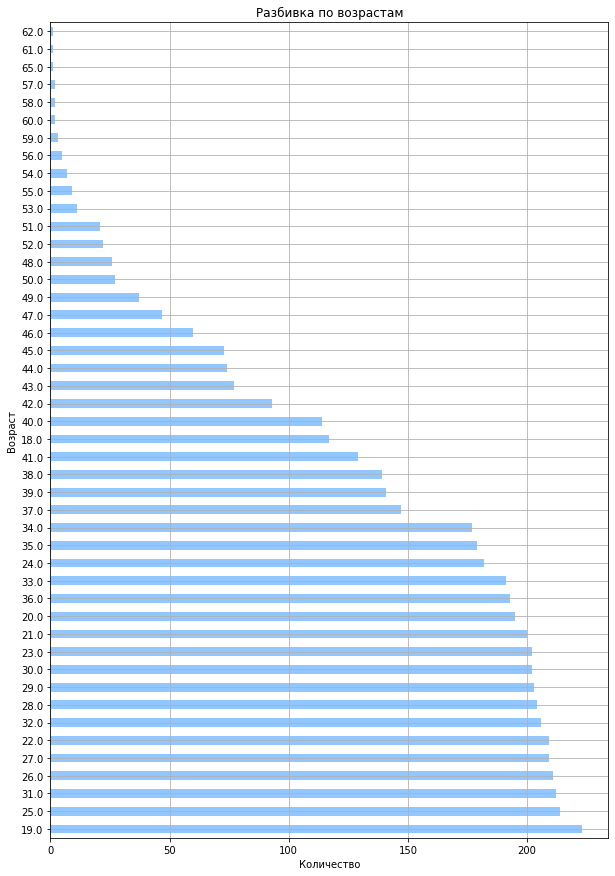

In [8]:
(
    df['Возраст']
    .value_counts()
    .plot(kind='barh',
          figsize = (10,15), 
          label = 'Пол', 
          grid =True)
)
plt.title('Разбивка по возрастам')
plt.xlabel("Количество")
plt.ylabel("Возраст")
plt.show()


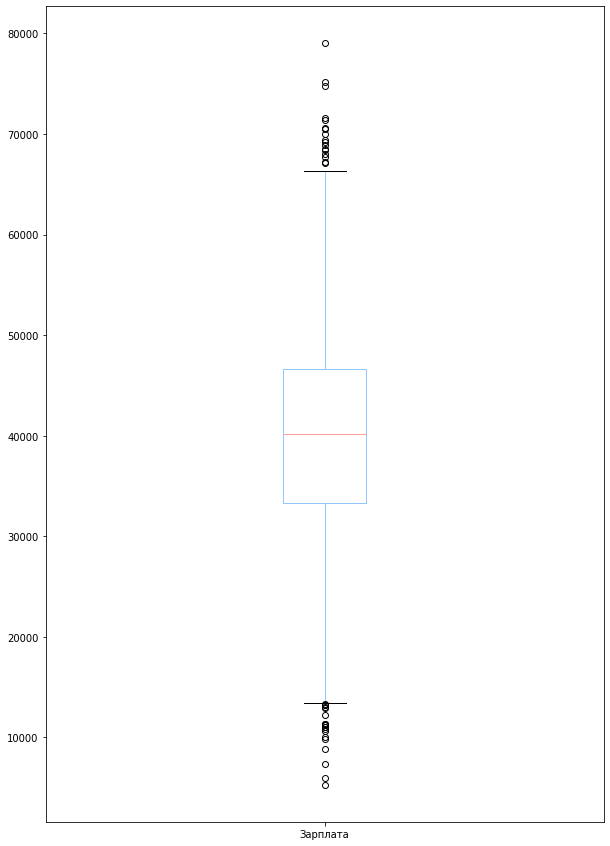

In [9]:
df["Зарплата"].plot(kind = 'box', figsize = (10, 15), label ='Зарплата')
plt.show()

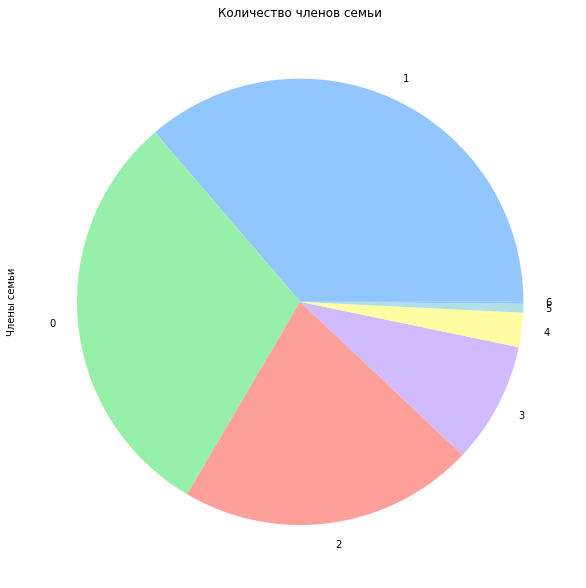

1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64

In [10]:
(
    df['Члены семьи']
    .value_counts()
    .plot(kind='pie',
          figsize = (10,15), 
          grid =True)
)
plt.title('Количество членов семьи')
plt.show()

df['Члены семьи'].value_counts()

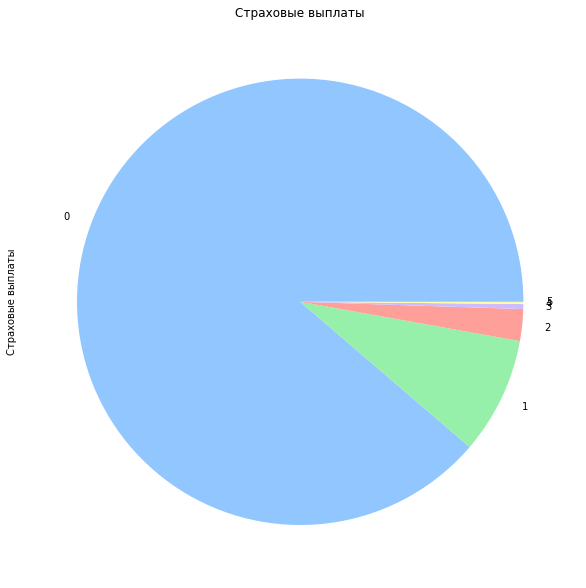

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

In [11]:
(
    df['Страховые выплаты']
    .value_counts()
    .plot(kind='pie',
          figsize = (10,15), 
          grid =True)
)
plt.title('Страховые выплаты')
plt.show()

df['Страховые выплаты'].value_counts()


### Вывод:


* В датафрейме 5000 строк.
* Данные в предобработке не нуждаются.
* Разделение по полу почти в равном количестве.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос: Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)**
* a. Изменится. Приведите примеры матриц.
* b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.


**Ответ:** Не изменится.

**Обоснование:**

Признаки умножают на обратимую матрицу $P$:

$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y
$$

Транспонированное произведение матриц равно произведению транспонированных матриц, взятых в обратном порядке

$$
w_1 = (P^T X^T XP)^{-1} P^T X^T y
$$

Используя формулу

$$
(A * B)^{-1} = B^{-1} * A ^{-1}
$$


где $A$ и $B$ квадратные <br>
$P$, $P^T$ и $X^T X$ квадратные


$$
w_1 = P^{-1} ( X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Умножение матрицы на обратную матрицу равно единичной матрице

$$
w_1 = P^{-1} ( X^T X)^{-1} IX^T y
$$

Умножение любой матрицы на единичную равно этой самой матрице.

$$
w_1 = P^{-1} ( X^T X)^{-1} X^T y
$$


$$
a_1 = XPw_1
$$

$$
a_1 = XPP^{-1} ( X^T X)^{-1} X^T y
$$

$$
a_1 = X( X^T X)^{-1} X^T y
$$

$$
a_1 = Xw
$$

### Вывод: 

Посредством преобразования формулы мы выяснили, что при умножении признаков на обратимую матрицу качество не меняется.

## Алгоритм преобразования

### **Алгоритм**

* Необходимо умножить матрицу признаков на матрицу шифрования так-как при умножении количество столбцов матрицы $A$ должно быть равно количеству строк матрицы, полученная матрица будет иметь количество строк матрицы $A$ и количество столбцов матрицы $B$.
* Поэтому размер матрицы щифрования на которую умножают равен 4х4

* Матрицу шифрования сгенерируем с помощью np.random.normal()

### **Обоснование**

Разделим датафрейм на признаки и целевой признак:


In [12]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Создадим обратимую квадратную матрицу со случайными числами размерностью столбцов features:

In [13]:
state = np.random.RandomState(12345)
matrix_encryption=np.random.normal(size=(features.shape[1],features.shape[1]))

In [14]:
np.linalg.inv(matrix_encryption)


array([[-4.71159219,  0.39627532, -1.03948879, -2.66498895],
       [ 2.36867442,  0.05468061,  0.01073095,  0.42617528],
       [-2.01331389, -0.20276682, -0.120583  , -1.25255485],
       [-0.98037155,  0.55572018,  0.06251808, -0.09098138]])

Зашифруем даннные путем умножения матриц

In [15]:
features_encryption = features @ matrix_encryption
features_encryption

,0,1,2,3
0,-56814.881819,26766.459302,123946.307345,83178.422792
1,-43525.817359,20517.865029,94957.186087,63748.710275
2,-24053.399842,11342.419855,52476.841743,35235.576207
3,-47767.118997,22490.266235,104204.071728,69907.983966
4,-29895.879673,14090.978110,65222.101869,43779.900842
...,...,...,...,...
4995,-40892.970119,19262.194548,89209.476036,59865.251409
4996,-60023.225472,28269.199899,130943.835050,87858.985400
4997,-38831.881052,18285.434605,84711.898377,56836.193814
4998,-37456.878937,17639.759190,81711.755901,54828.163738


### Вывод:

После умножения размер матрицы признаков и кодированных признаков совпадает.

## Проверка алгоритма

### Качество линейной регресии на нешифрованных данных

In [16]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print("R2:", r2_score(target, predictions))

R2: 0.4249455028666801


### Качество линейной регресии c шифрованием данных

In [17]:
model = LinearRegression()
model.fit(features_encryption, target)
prediction = model.predict(features_encryption)
print("R2:", r2_score(target, predictions))

R2: 0.4249455028666801


##  Вывод:


В результате нашей работы был разработан алгоритм, где данные были преобразованы методом умножения признаков исходных данных на обратимую матрицу P. Результатом такого преобразования явилась новая (изменённая) матрица признаков, которая справилась с основными задачами по шифровке данных и при сравнении качества предсказаний с моделью из Scikit−learn, сохранила значения R2 и MSE неизменными.

Таким образом мы выполнили требования поставелнной задачи и компания «Хоть потоп» может спать спокойно!